# CLASE 25: ¿QUÉ ES Y PORQUÉ CLUSTERING?

# 10. Clustering

Acá va a ser donde todo el conocimiento que adquirimos hasta ahora se va a juntar. 

Lo que vamos a hacer es tratar de _clusterizar_ una colección de vectores en grupos o clústers de vectores que son los que estarán cerca unos de otros y todo a través de medir las distancias a pares. 

Supongamos que tenemos un grupo de $N$ $n$-vectores $x_{0},x_{1},\dots,x_{N-1}$. El objetivo de _clustering_ es agrupar (si es posible) en $k$ grupos los vectores tal que dentro de esos grupos estén lo más cerca posible unos de otros. 

![](imagenes/img11.png)

## 10.1 El objetivo de clustering

**Específicar el asignamiento de clúster**. Uno de los primeros problemas es asignar a una serie de vectores un clúster. Ahora, para empezar, vamos a partir teniendo las etiquetas $1,2,\dots,k$ que representan los clusters o grupos y estas etiquetas se las vamos a asignar a nuestros $N$ vectores usando al $N$-vector $c$, donde $c_{i}$ va a representar el grupo al que el vector $x_{i}$ está asignado. Por ejemplo, si $N=6$ y $k=3$, y además $c^{T} = [3,1,1,1,2,2]$ entonces esto significa que el vector $x_{0}$ quedará asignado al grupo $3$, los vectores $x_{1},x_{2},x_{3}$ estarán asignados al grupo $1$ y los vectores $x_{4},x_{5}$ quedarán asignados al grupo 2. Ahora, una forma alternativa de expresar esto es con conjuntos de los index de los vectores. Vamos a denotar como $G_{i}$ al grupo $i$ de indices de vectores que pertenecen a cada grupo. Continuando nuestro ejemplo entonces tenemos que

$$
G_{1} = \{1,2,3\}, \qquad G_{2} = \{4,5\}, \qquad G_{3} = \{0\}
$$

**Representativos de un grupo.** Ahora, consideremos de nuevo que tenemos $k$ grupos, a cada uno de estos grupos le vamos a asignar un vector representativo, el cual vamos a denotar por $z_{1},z_{2},\dots,z_{k}$. Estos vectores representativos pueden ser cualquier vector, no tience que ser necesariamente uno de los vectores dados sin embargo tiene que ser tal que la distancia de este $z_{i}$ a todos los otros vectores del grupo sea la mínima.

![](imagenes/img12.png)

**Un objetivo de clustering.** Ahora bien, ya que definimos lo anterior podemos dar una métrica que nos ayude a juzgar la elección de un clúster en conjunto con los representativos de cada grupo. Definimos entonces:

$$
J^{clust} = (||x_{0}-z_{c_{1}}||^{2}+\cdots+||x_{N-1}-z_{c_{N}}||^{2})/N
$$

**Clustering óptimo y subóptimo.** Nosotros vamos a buscar un clustering, es decir, un asignamiento de cluster $c_{1},c_{2},\dots,c_{N}$ y vamos a elegir unos representativos $z_{1},z_{2},\dots,z_{N}$ que minimicen el objetivo $J^{clust}$. Al que nos retorne el $J^{clust}$ mínimo le vamos a llamar clustering óptimo. Aunque no existe tal solución lo que vamos a hacer es aproximarla por medio del algoritmo *k-means*, a esta solución le llamaremos *subóptima* y aunque no es solución exacta del problema es lo sufientemente buena para poder trabajar con ella. 

# CLASE 26: UNA APROXIMACIÓN: K-MEANS

## 10.2 El algoritmo K-Means

**ALGORITMO** Algoritmo K-Means  
**iniciar** Se da una lista de $N$ vectores y una lista de $k$ vectores representativos $z_{1},z_{2},\dots,z_{k}$  

repetir hasta la convergencia:
1. *Parte los vectores en k-grupos*. Para cada vector $i=0,\dots,N-1$, asigna  $x_{i}$ a un grupo asociado con su representativo más cercano. 
2. *Actualiza los representativos de cada cluster*. Para cada grupo $1,\dots, k$ selecciona $z_{j}$ como el promedio de los vectores del grupo $j$.

![](imagenes/img13.png)

![](imagenes/img14.png)

![](imagenes/img15.png)

![](imagenes/img16.png)

![](imagenes/img17.png)

# CLASE 27: K-MEANS EN PYTHON

In [10]:
# Funcion que asigna a cada vector al cluster que pertenece, recibe
# como datos el data que son los vectores y centroids que son los 
# vectores representativos z
def group_assignment(data, centroids):
    grouping_vec_c = np.zeros(len(data))
    for i in range(len(data)):
        dist = np.zeros(len(centroids))
        for j in range(len(centroids)):
            dist[j] = np.linalg.norm(data[i] - centroids[j])
        min_dist = min(dist)
        for j in range(len(centroids)):
            if min_dist == dist[j]:
                grouping_vec_c[i] = j+1
    return grouping_vec_c

In [11]:
# Función para actualizar el centroide de acuerdo a los vectores
# que se asocian a ese centroide, recibe como datos, el data que son 
# los vectores, grouping que es id del cluster de cada vector y 
# centroids que son los centroides actuales.
def update_centroid(data, grouping, centroids):
    new_centroids = []
    for i in range(len(centroids)):
        cent = np.zeros(len(data[0]))
        count = 0
        for j in range(len(data)):
            if grouping[j] == (i + 1):
                cent = cent + data[j]
                count += 1
        group_average = cent/count
        new_centroids.append(group_average)
    return new_centroids

In [12]:
# Función para hallar el clustering objetive J, este valor se busca 
# que en cada iteración se acerque mas a cero, recibe como datos el
# data o los vectores, el grouping o ids del cluster de cada vector
# y los centroids
def clustering_objetive(data, grouping, centroids):
    J_obj = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            if grouping[i] == (j + 1):
                J_obj += np.linalg.norm(data[i] - centroids[j])**2
    J_obj = J_obj/len(data)
    return J_obj

In [13]:
# Función que halla lo K-Means, este ensambla todas las funciones 
# anteriores, recibe como datos, la data que son los vectores, y 
# centroids que son los primeros centroides para la iteración
def Kmeans_alg(data, centroids):
    # Contador de iteraciones
    iteration = 0
    # Vector para saber como evoluciona el clustering objetive en cada
    # iteración
    J_obj_vector = []
    # Booleno para detener las iteraciones cuando la diferencia entre
    # ambos es menor 1*10^-6
    Stop = False
    while Stop == False:
        grouping = group_assignment(data, centroids)
        new_centroids = update_centroid(data, grouping, centroids)
        J_obj = clustering_objetive(data, grouping, new_centroids)
        J_obj_vector.append(J_obj)
        iteration += 1
        if np.linalg.norm(np.array(new_centroids) - np.array(centroids)) < 1e-6:
            Stop = True
        else:
            centroids = new_centroids
    return new_centroids, grouping, J_obj_vector, iteration

In [14]:
# Se importa las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

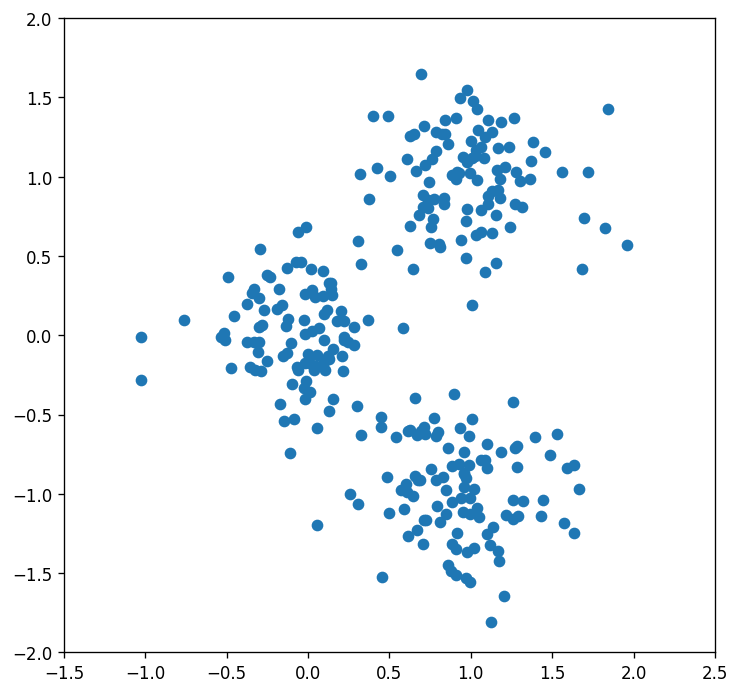

In [15]:
fig,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
# Se crean los puntos a analizar, concentradolos intencionalmenete en
# tres puntos: (0,0), (-1,1) y (1,1)
X = np.concatenate([[0.3*np.random.randn(2) for i in range(100)],\
                    [[1,1] + 0.3*np.random.randn(2) for i in range(100)], \
                    [[1,-1]+ 0.3* np.random.randn(2) for i in range(100)]])
# Se grafican los puntos
ax.scatter( X[:,0],X[:,1])
ax.set_xlim(-1.5,2.5)
ax.set_ylim(-2,2)
plt.show()

In [23]:
# Se calcula los K-Means, para este caso se da como centroides los 
# tres primero vectores de la data
A = Kmeans_alg(X, X[:3])
print('len(A):\n', len(A))
print('')
print('Vectores Representativos:\n', A[0])
print('')
print('iteraciones:\n', A[3])
print('')
print('J_obj:\n', A[2])

len(A):
 4

Vectores Representativos:
 [array([-0.07346608,  0.01188893]), array([ 0.92993837, -0.97548574]), array([0.99288134, 0.98560059])]

iteraciones:
 4

J_obj:
 [0.31913216433030306, 0.17945322998728758, 0.17789982489985862, 0.17789982489985862]


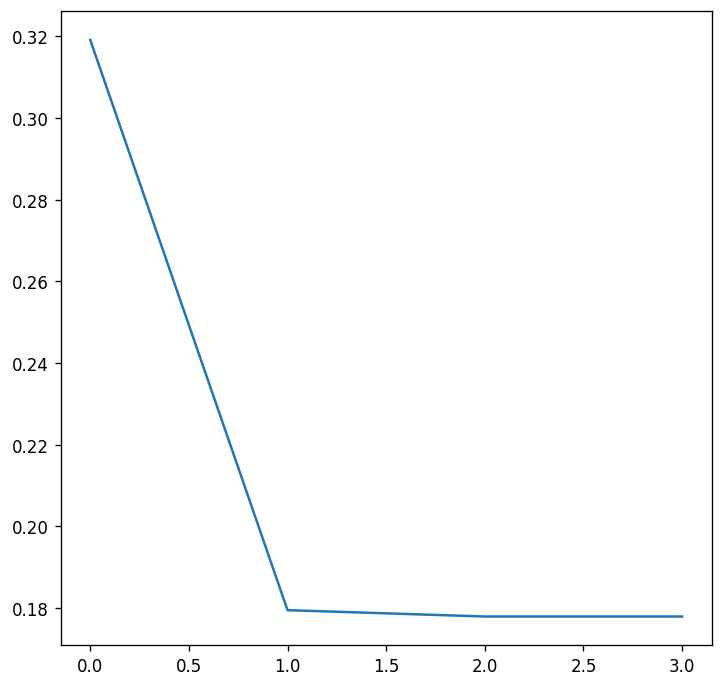

In [24]:
# Se grafica el clustering objetive de acuerdo con el número de 
# iteraciones
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(list(range(A[-1])),A[2])
plt.show()

# Reto

In [36]:
from sklearn.datasets import fetch_openml
import random
import itertools

In [32]:
# Se obtiene una serie de vectores con sus etiquetas asociadas
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [34]:
print('len(X): \n', len(X))

len(X): 
 70000


In [ ]:
A = Kmeans_alg(X,random.choices(X,k=9))
a = list(itertools.product(list(range(3)),list(range(3))))

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(7,7),dpi=120)
for i,j in zip(a,A[0]):
        ax[i[0]][i[1]].imshow(j.reshape(28,28))
plt.show()